# 项目：有关电影数据库数据集的调查

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括“用户评分”、“票房"、“演职人员 (cast)”、“电影类别 (genres)”、”经通货膨胀调整后的预算和票房”等信息。

> 在本次报告中，我们将主要围绕票房进行探索和分析。具体报告如下问题：
> 1. 电影评分和票房是否存在正向关系
> 2. 考察不同年份中, 不同电影类型的发行情况.
> 3. 按总收益来看, 哪些描述电影的关键字出现频率最多
> 4. 哪些导演的电影的票房比较高？



In [3]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline

<a id='wrangling'></a>
## 数据整理



### 常规属性

In [4]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
movie_data = pd.read_csv('tmdb-movies.csv')

> 载入数据

In [5]:
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> 直观的了解数据每列包含的信息

In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> 通过Dataframe的info()函数，了解数据整体结构以及整洁程度。我们需要探索的变量包括电影的受欢迎程度、电影的评分、电影的导演、电影的上映时间、经通货膨胀调整后的电影票房和电影预算等，以上变量从上述表格中看空值较少，信息较为完整。

### 针对探索问题进行数据清理

In [7]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。


In [8]:
movie_data_copy = movie_data

> 拷贝数据

In [9]:
movie_data_copy.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
movie_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [11]:
movie_data_copy = movie_data_copy.dropna()

In [12]:
movie_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo

> 删除空值

In [13]:
movie_data_copy = movie_data_copy[~movie_data_copy['revenue_adj'].isin([0])]

In [14]:
movie_data_copy = movie_data_copy[~movie_data_copy['budget_adj'].isin([0])]

In [15]:
movie_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null object
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-null flo

> 删除在预算和票房中为0的无效数据

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（电影评分和票房是否存在正向关系 ）

#### 图例1

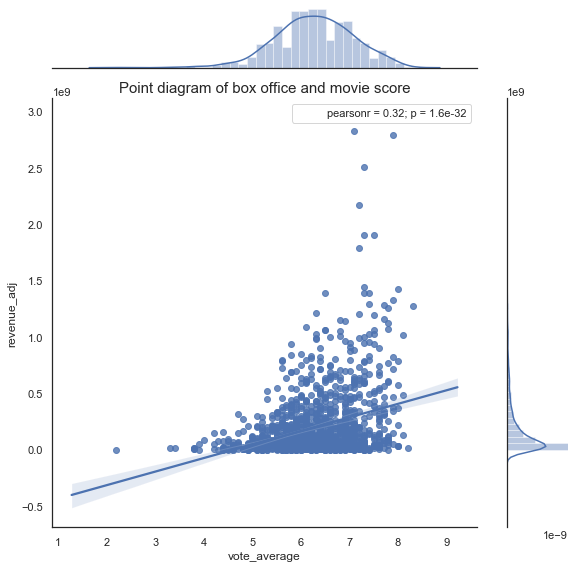

In [16]:
warnings.simplefilter("ignore")
j = sns.jointplot(data=movie_data_copy, y='revenue_adj',x='vote_average', kind="reg", size=8, space=0.5)
j.annotate(stats.pearsonr)
plt.title('Point diagram of box office and movie score',fontsize=15)
plt.show()

> 根据票房与评分的散点图可以看出票房与评分呈现出右偏的分布，评分高的影评出现高票房的概率更高。同时在上图中可以看出两者的线性关系，皮尔逊相关系数是0.27.

#### 图例2

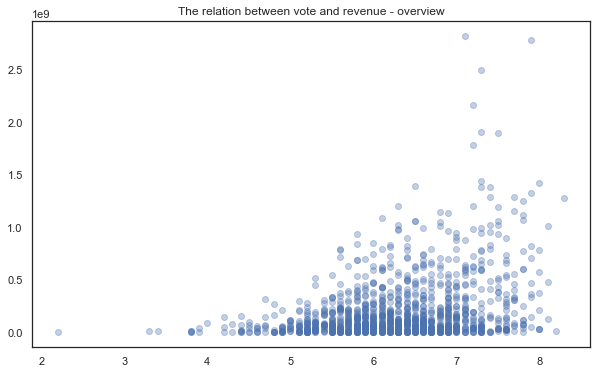

In [17]:
plt.figure(figsize=(10,6))
plt.title("The relation between vote and revenue - overview")
plt.scatter(movie_data_copy['vote_average'],movie_data_copy['revenue_adj'],marker='o',alpha = 1/3)
plt.savefig('test.png')

> 根据票房与评分的散点图可以看出票房与评分呈现出右偏的分布，评分高的影评出现高票房的概率更高。
> 但由于票房与评分皆为离散数据，出现重合的情况较多。故下图中，将根据票房分成四个截图，呈现更加细致的票房与评分的关系。

### 研究问题 2（考察不同年份中, 不同电影类型的发行情况.）

In [18]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('dark_background')

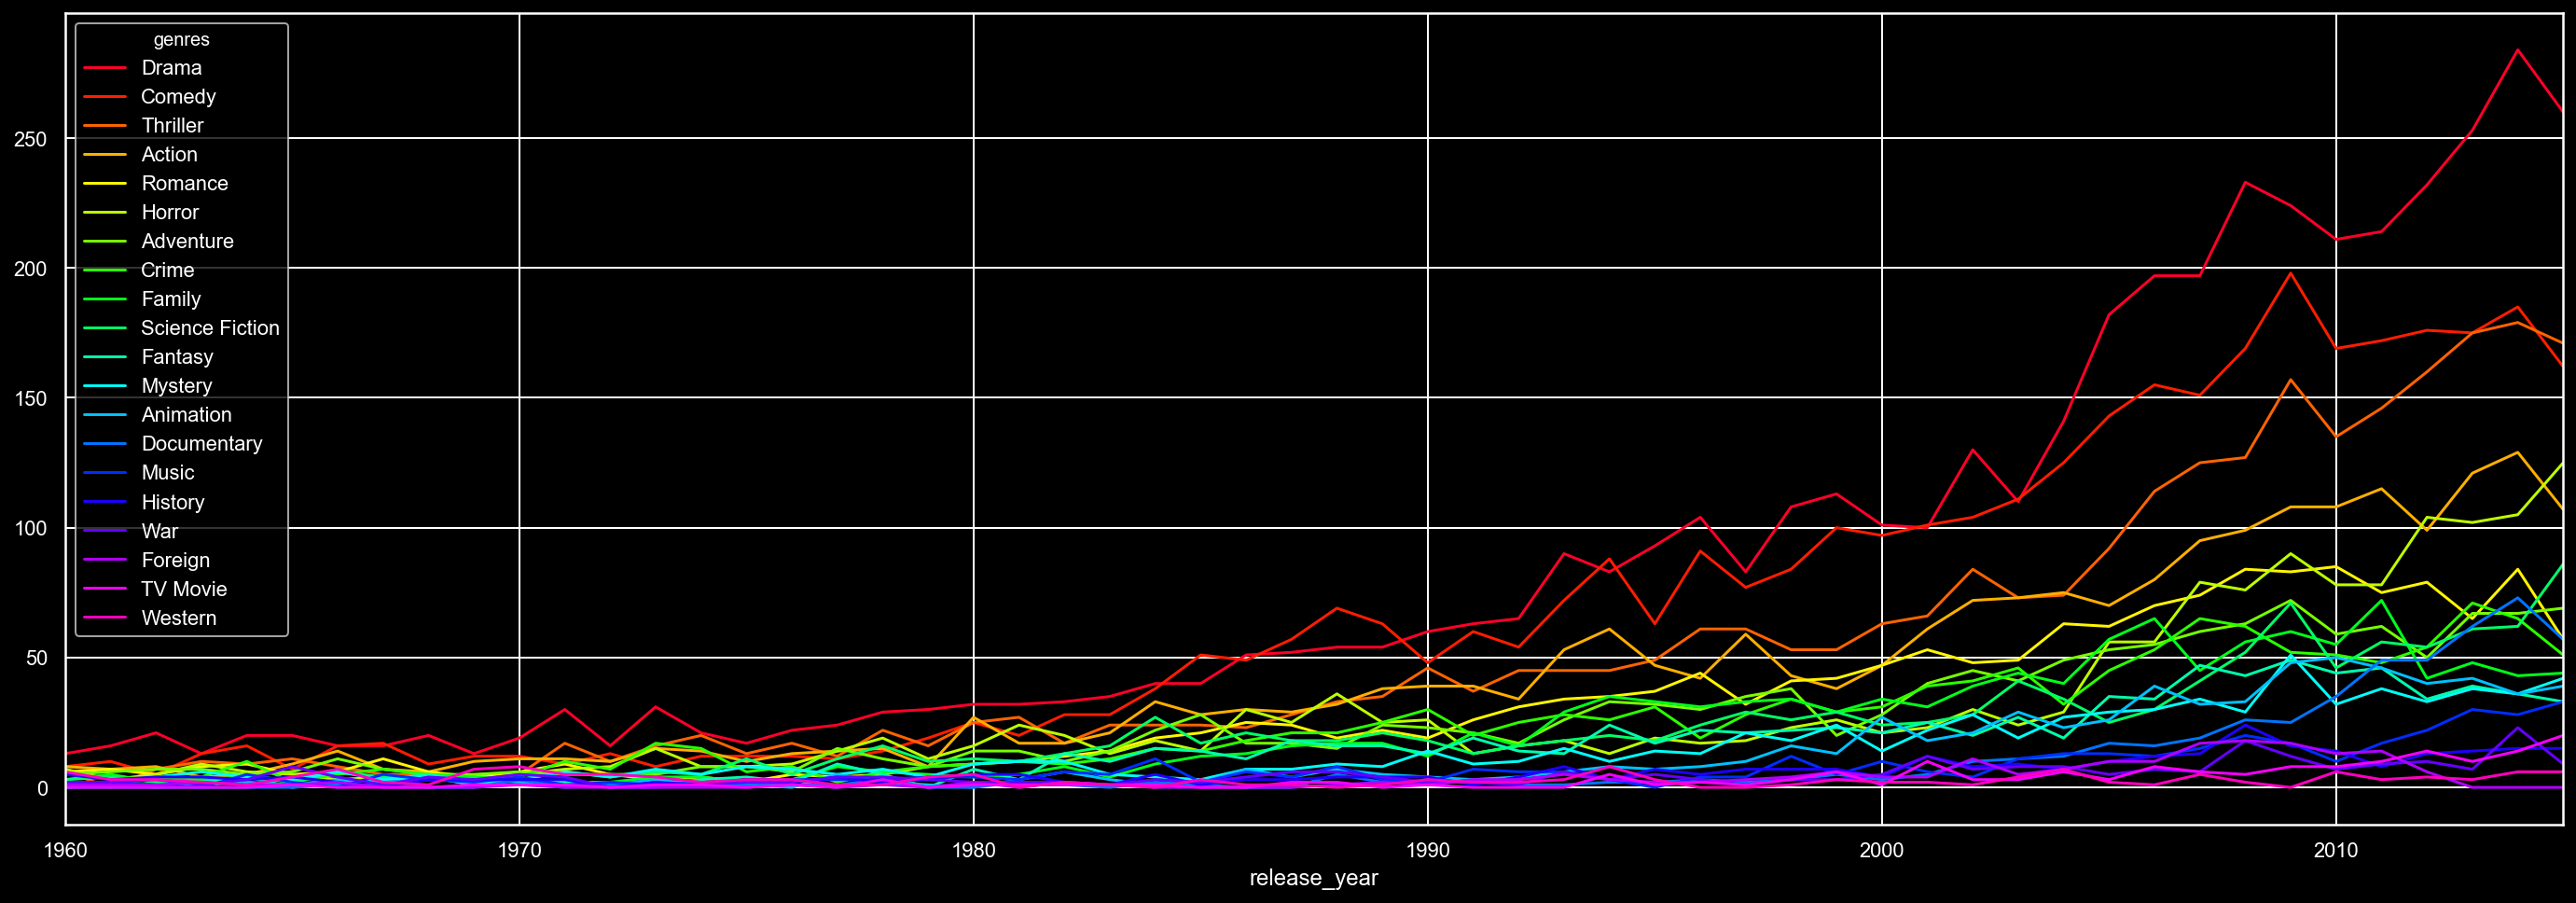

In [19]:
# 拆分
df_genres = movie_data.drop('genres', axis=1).join(movie_data['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
target_data = df_genres.groupby('genres')['release_year'].value_counts().unstack().fillna(0)
target_data['sort_val'] = target_data.sum(axis=1)
target_data = target_data.sort_values('sort_val', axis=0, ascending=False).drop('sort_val', axis=1)
target_data.T.plot(colormap='gist_rainbow', figsize=(24, 8), grid=True)

> From graph above, we can see the amount of genres of drama, comedy and thriller is increasing with time rapidly. 

### 研究问题 3（电影的预算和票房是否存在正向关系）

In [20]:
from wordcloud import WordCloud
%config InlineBackend.figure_format = 'retina'

In [21]:
# organize data
factor = 'revenue_adj'
kw_expand = movie_data['keywords'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('keywords')
df_kw_rev = movie_data[[factor]].join(kw_expand)
word_dict = df_kw_rev.groupby('keywords')[factor].sum().apply(lambda x: np.exp(x/1e11)).to_dict()


In [22]:
# create wordcloud
params = {'mode': 'RGBA', 
          'background_color': 'rgba(255, 255, 255, 0)', 
          'colormap': 'Spectral'}
wordcloud = WordCloud(width=1200, height=800, **params)
wordcloud.generate_from_frequencies(word_dict)

(-0.5, 1199.5, 799.5, -0.5)

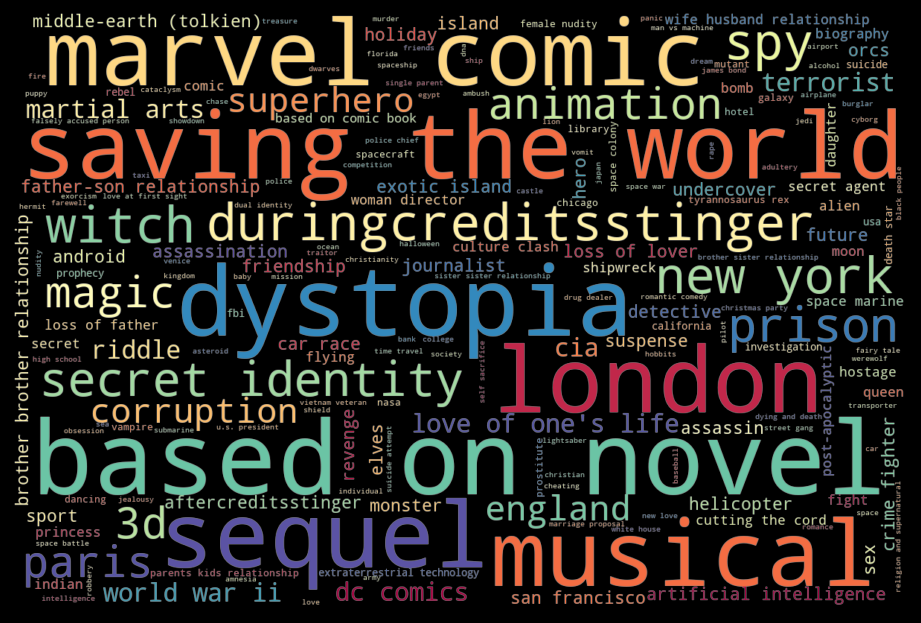

In [23]:
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

 > From the graph, we can see “based on novel" is the most frequent keyword.

### 研究问题 4 (哪些导演的电影的票房比较高？)

In [24]:
movie_data_director= movie_data_copy.groupby(['director'])['revenue_adj'].mean().reset_index().sort_values(['revenue_adj'],axis = 0,ascending = False)[0:9]


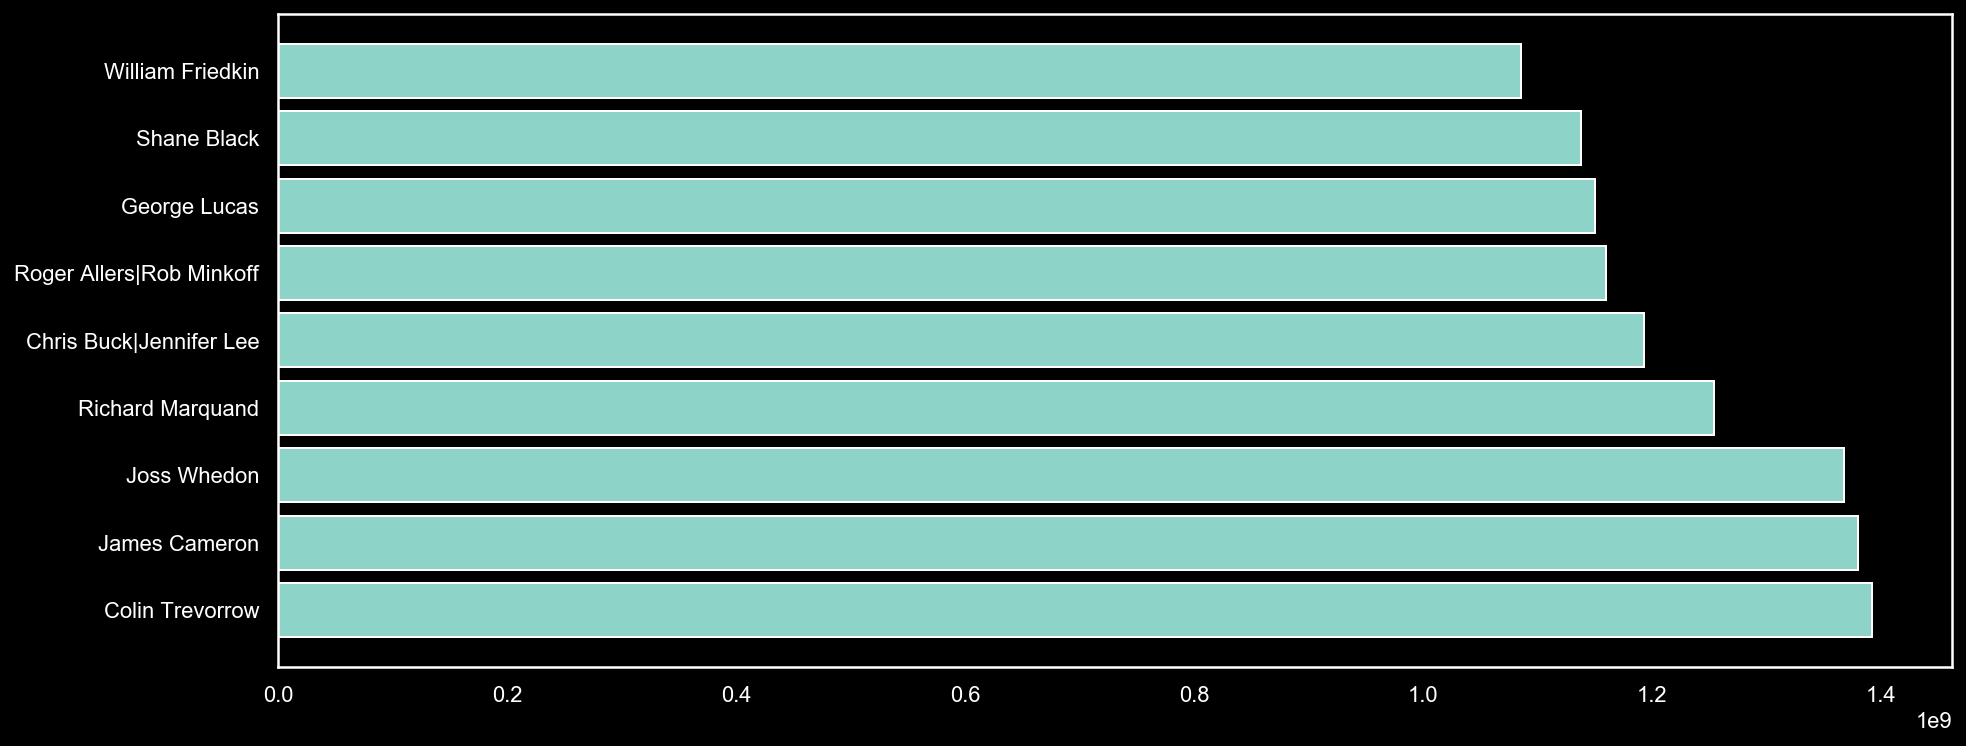

In [25]:
plt.figure(figsize=(15,6))
plt.barh(movie_data_director['director'],movie_data_director['revenue_adj'])  
plt.show()  

> 上图中列示了所有电影的平均票房最高的导演，其中Irwin Winkler 执导的电影平均票房最高。

<a id='conclusions'></a>
## 结论

> 综上，主要围绕票房进行了数据性探索，得出的初步结论包括票房同电影评分、电影受欢迎程度以及预算呈现一定的正向关系。同时所有导演中，Irwin Winkler是平均票房最高的导演。
> 同时，上述分析存在一定的局限性：
> 1. 上述数据期限为1960 - 2015年的数据，而近年来电影市场非常较快，尤其是中国市场。故数据中缺少近年来的数据，以及缺少中国的影片的信息，可能导致整体分析存在不完整的情况。
> 2. 上述数据分析主要围绕了电影票房（因变量），电影的受欢迎程度、电影的评分、电影的导演、经通货膨胀调整后电影预算（若干自变量）进行分析，同时未考虑上述自变量之间可能存在的相关性。基于上述范围和假设，虽然本次探索分析只用了整个数据集的子集进行分析，但是使用的子集可以支撑得出的结论。
> 3. 本次分析对于异常值以及空值进行了全部删除，以免影响数据的准确性。但是，同时也导致了数据减少的情况，可能对于最终的结论产生一定的影响。